In [1]:
import numpy as np
import PIL.Image
from glob import glob

In [7]:
lte_path = glob("fcc477actual/sentinel2/co/npz/*npz")
lte = np.asarray([np.load(l, allow_pickle=True)["arr_0"] for l in lte_path])

In [15]:
scales = [75,50,10]
cats = [2,4,10]

for s,c in zip(scales,cats):
    X = np.round(lte/s).astype(np.uint8)
    X_imgs = [PIL.Image.fromarray(x) for x in X]
    
    for x,l in zip(X_imgs,lte_path):
        x.save(l.replace(".npz",".jpg").replace("npz\\","cat{}_".format(c)))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


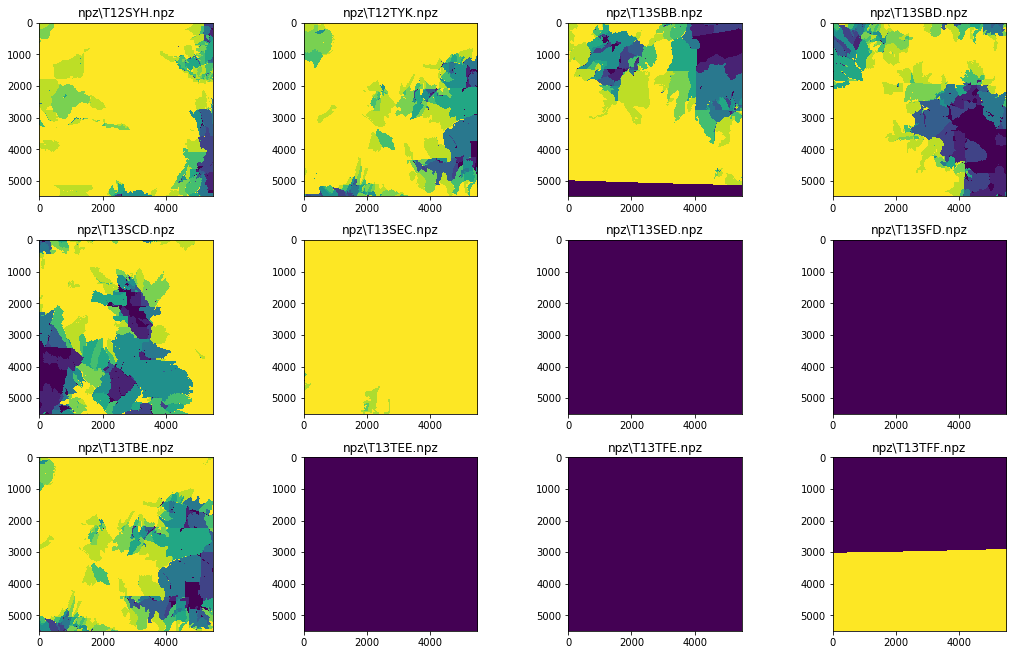

In [16]:
%pylab
%matplotlib inline
figure(figsize=(15,15))
for i,x in enumerate(X):
    subplot(5,4,i+1)
    title(lte_path[i].split("/")[-1])
    imshow(x)
tight_layout()